In [69]:
def convert(img1):
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img2[i, j] = get_distance(img1[i, j,:])
    return img2

def get_distance(v, w = [1/3, 1/3, 1/3]):
    a, b, c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    #d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    d = ((a*w1)**2 + (b*w2)**2 + (c*w3)**2)**.5
    return d

def get_default_mask_formean():
    return np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_formean()
    return sum(sum(part_of_image * mask))

In [68]:
block_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9
sum(sum(block_1))

1.0

In [65]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
os.getcwd(),os.listdir()

('/home/metehan/Masaüstü',
 ['first.cpp',
  'adli-sicil-kaydi.pdf',
  'Simple-SPA-master',
  '.desktop',
  'pattern.svg',
  'React',
  'mezunBelgesi.pdf',
  'first.c',
  'yerlesim-yeri-ve-diger-adres.pdf',
  '69-staj-ucret-bilgisi.docx',
  '.vscode',
  'bashfile',
  'satranç.jpeg',
  'ödev',
  'deneme.js',
  'swapFaces',
  'cameraman.jpg',
  'unnamed.jpg',
  'Cameraman.jpeg',
  'MetehanSever_CV.pdf',
  '26524636150_Ogrenci.pdf',
  'ataturk.jpeg',
  'MetehanSever-bitirmeprojesi.pdf',
  'Simple-SPA-master.zip',
  'firstOpenGLApp',
  'html-css-ogreniyoruz-master',
  '70-staj-sozlesme-2017.docx'])

<function matplotlib.pyplot.show(*args, **kw)>

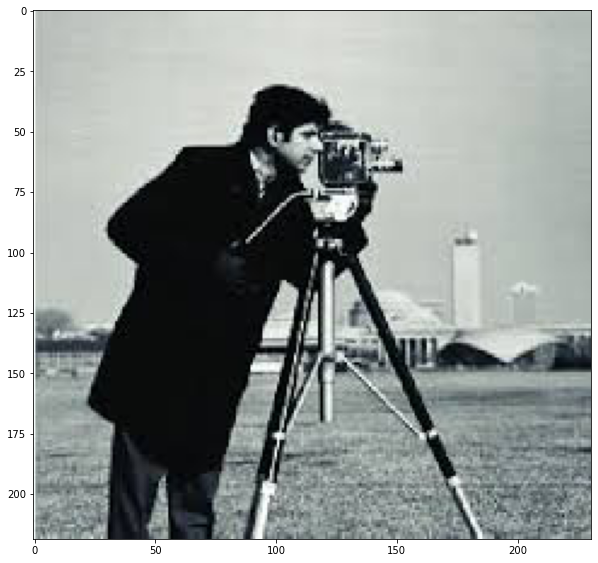

In [66]:
img1 = mpimg.imread('Cameraman.jpeg')
img2 = convert(img1)
%matplotlib inline
plt.figure(figsize = (10,10))
plt.imshow(img1)
plt.show

In [67]:
def get_default_mask_formean():
    return np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_formean()
    return sum(sum(part_of_image * mask))

def get_median_for_55(poi):
    s1 = poi.reshape(1,25)
    s1.sort()
    return s1[0,13]

def get_median(poi):
    s1 = poi.reshape(1, 9)
    s1.sort()
    return s1[0,4]

def get_mean_filter_for_55(img1):
    
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range (3, m-3):
        for j in range (3, n-3):
            poi = img1[i-2:i+3, j-2:j+3]
            img2[i, j] = get_median_for_55(poi)
    return img2

def get_mean_filter(img1):
    
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range(1, m-1):
        for i in range(1, n-1):
            poi = img1[i-1:i+2, j-1:j+2]
            img2[i,j] = get_median(poi)
    return img2

In [70]:
i, j = 10, 10
poi100 = img1[i-2:i+3, j-2:j+3]
poi100.shape

(5, 5, 3)

In [71]:
i, j = 10, 10
poi100 = img2[i-2:i+3, j-2:j+3]
poi100.shape

(5, 5)

In [73]:
apply_mask(img2[1:4, 1:4])

108.16414466221175

In [ ]:
img55 = get_mean_filter_for_55(img2)
img555 = get_mean_filter(img2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe309d37e20>,
 <matplotlib.image.AxesImage at 0x7fe30a199af0>)

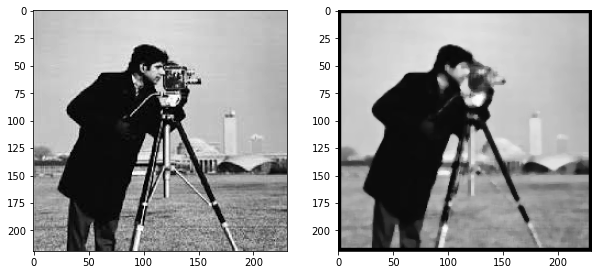

In [76]:
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1), plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img55, cmap = 'gray')